In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"mall_cust/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


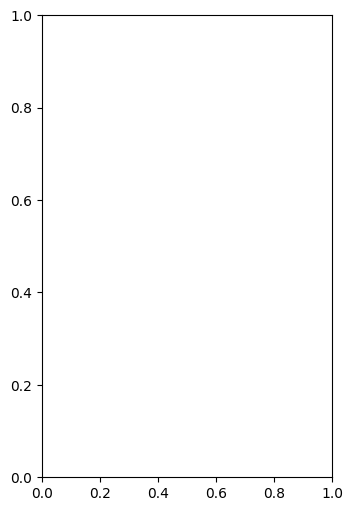

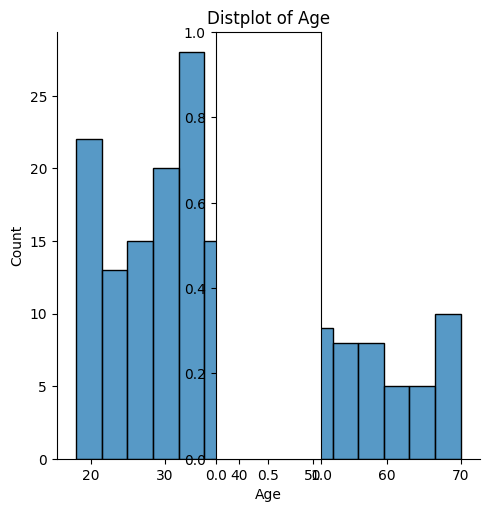

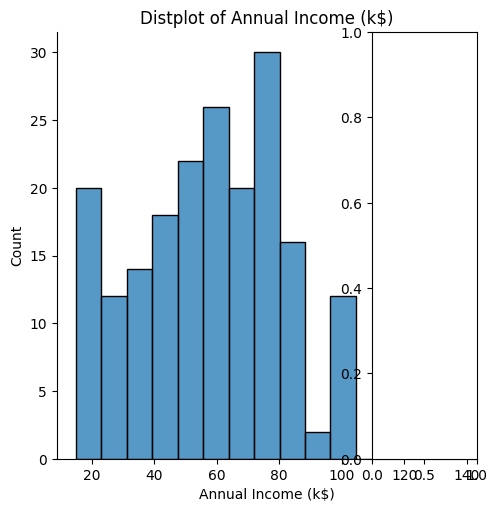

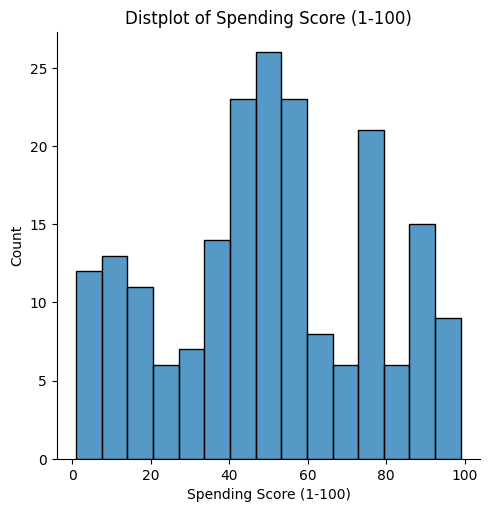

In [11]:
plt.figure(figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.displot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

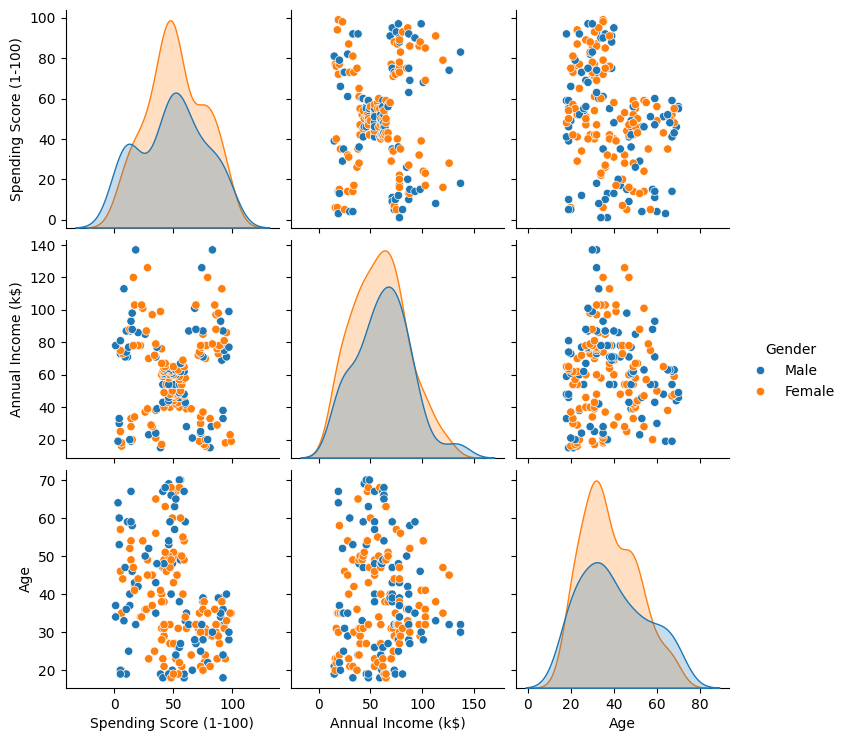

In [9]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue= "Gender")

#2D Clustering Based on Age and Spending Score


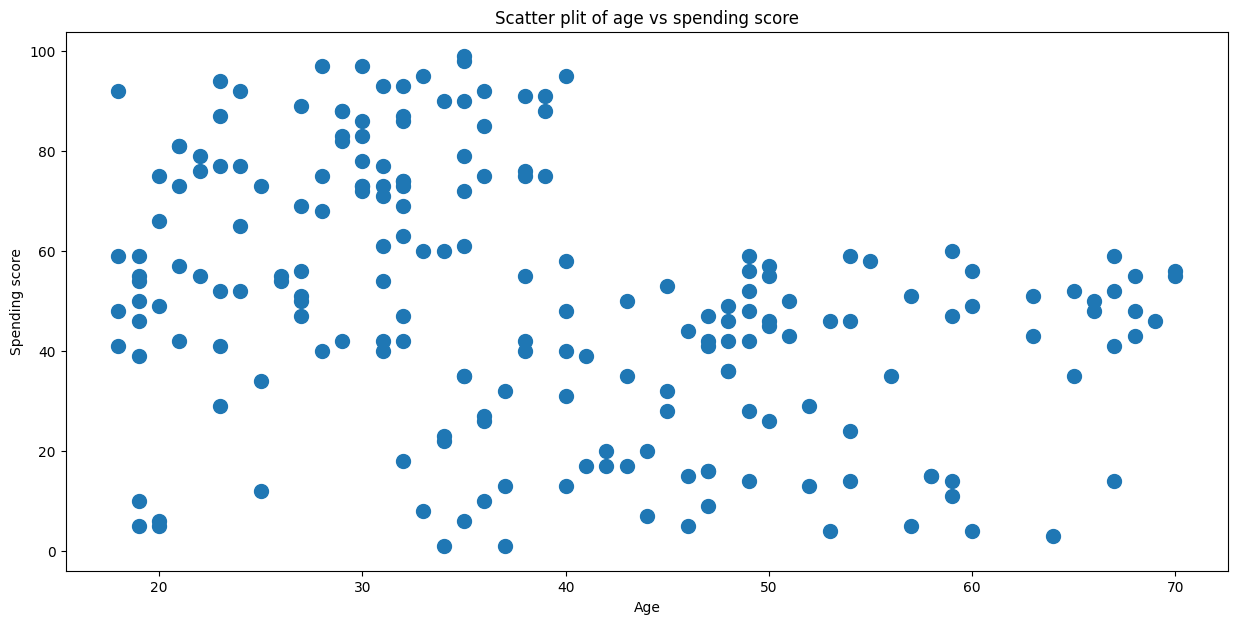

In [10]:
plt.figure(figsize=(15,7))
plt.title('Scatter plit of age vs spending score')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.scatter(x='Age', y='Spending Score (1-100)', data=df, s=100)
plt.show()

In [12]:
from sklearn.cluster import KMeans

x1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,15):
    algo = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    algo.fit(x1)
    inertia.append(algo.inertia_)
    

c:\Users\niran\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_kmeans.py:1400: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


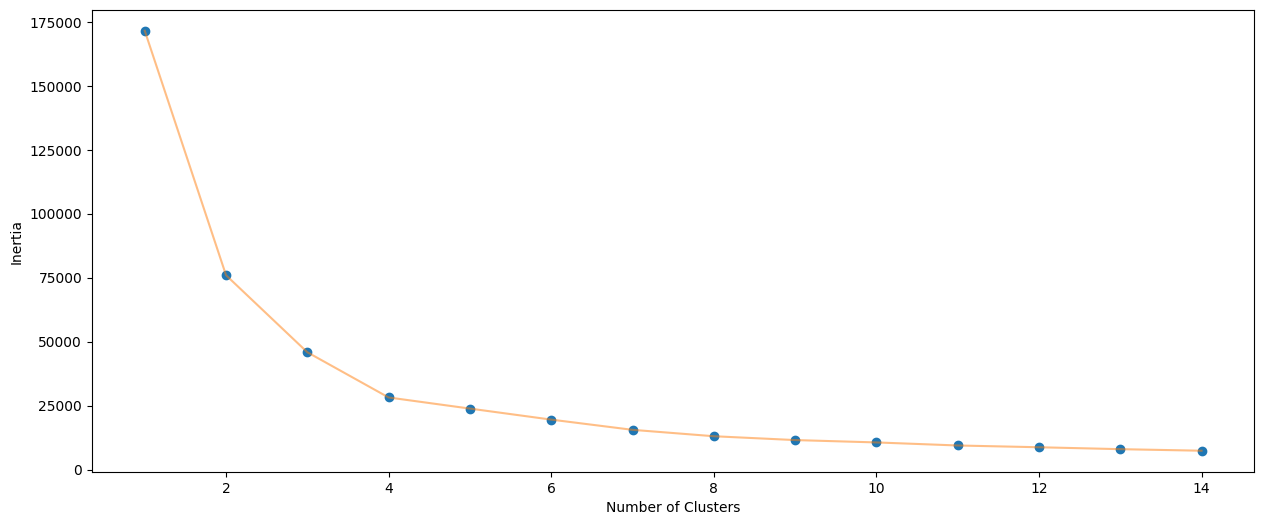

In [13]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,15), inertia, 'o')
plt.plot(np.arange(1,15), inertia, '-', alpha= 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()


In [14]:
#Applying kmeans for n = 4
algo = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol= 0.0001, random_state=111, algorithm='elkan'))
algo.fit(x1)
labels1 = algo.labels_
centroids = algo.cluster_centers_

In [15]:
h = 0.02
x_min, x_max = x1[:,0].min() -1 , x1[:, 0].max()+1
y_min, y_max = x1[:,1].min() -1 , x1[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algo.predict(np.c_[xx.ravel(), yy.ravel()])

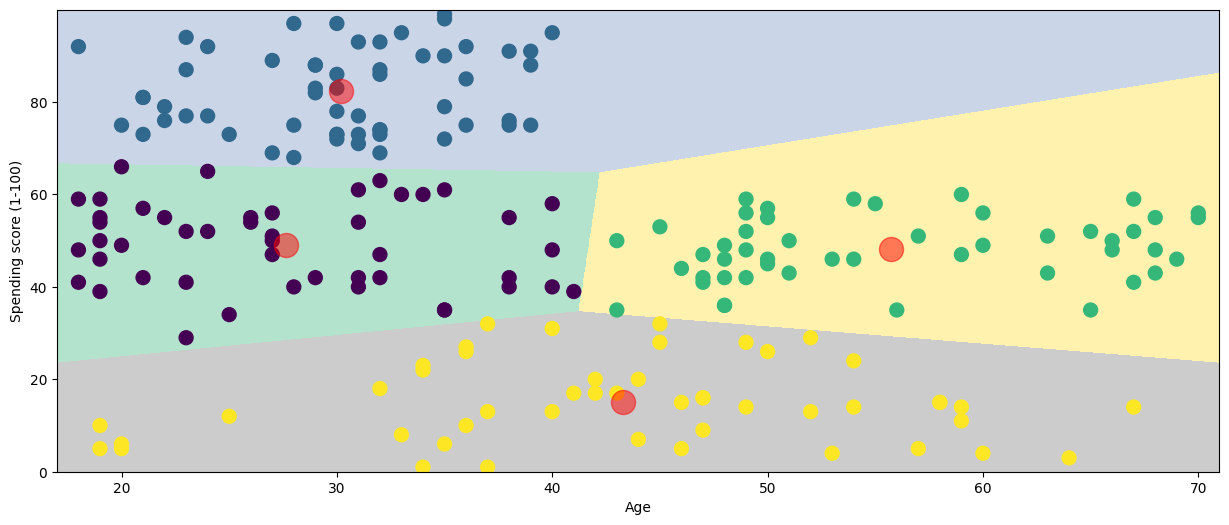

In [16]:
plt.figure(figsize=(15,6))
plt.clf()
z = z.reshape(xx.shape)
plt.imshow(z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x = 'Age', y='Spending Score (1-100)', data=df, c= labels1, s=100)
plt.scatter(x=centroids[:,0], y = centroids[:,1], s=300, c= 'red', alpha=0.5)
plt.ylabel('Spending score (1-100)'), plt.xlabel('Age')
plt.show()

kmean 5 cluster

In [17]:
algo = (KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol= 0.0001, random_state=111, algorithm='elkan'))
algo.fit(x1)
labels1 = algo.labels_
centroids = algo.cluster_centers_

In [18]:
h = 0.02
x_min, x_max = x1[:,0].min() -1 , x1[:, 0].max()+1
y_min, y_max = x1[:,1].min() -1 , x1[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algo.predict(np.c_[xx.ravel(), yy.ravel()])

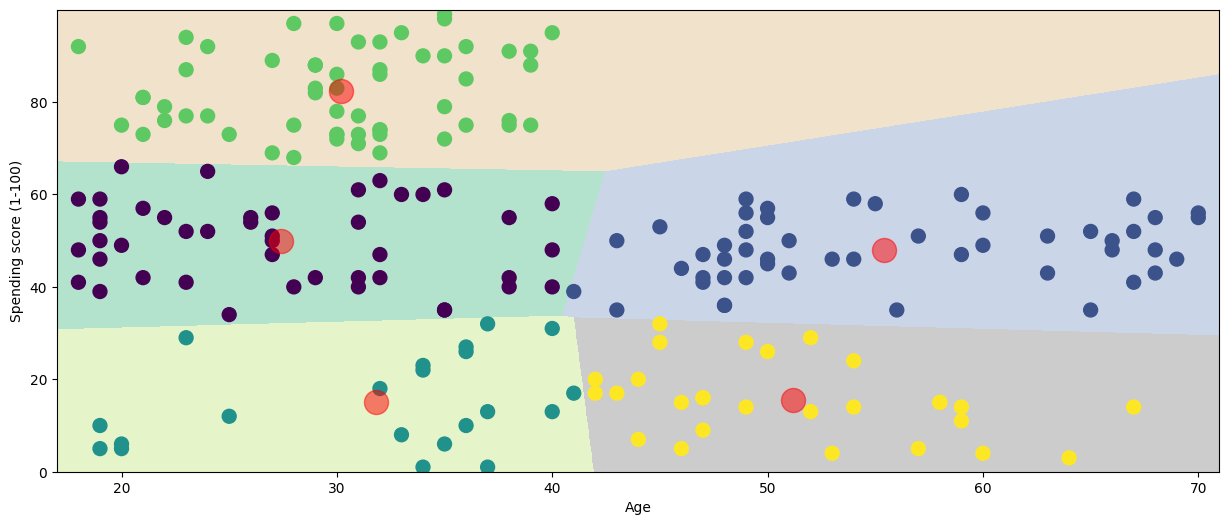

In [20]:
plt.figure(figsize=(15,6))
plt.clf()
z = z.reshape(xx.shape)
plt.imshow(z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x = 'Age', y='Spending Score (1-100)', data=df, c= labels1, s=100)
plt.scatter(x=centroids[:,0], y = centroids[:,1], s=300, c= 'red', alpha=0.5)
plt.ylabel('Spending score (1-100)'), plt.xlabel('Age')
plt.show()

2D Clustering based on Annual Income and Spending

In [21]:
x2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,15):
    algo = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    algo.fit(x2)
    inertia.append(algo.inertia_)

c:\Users\niran\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_kmeans.py:1400: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


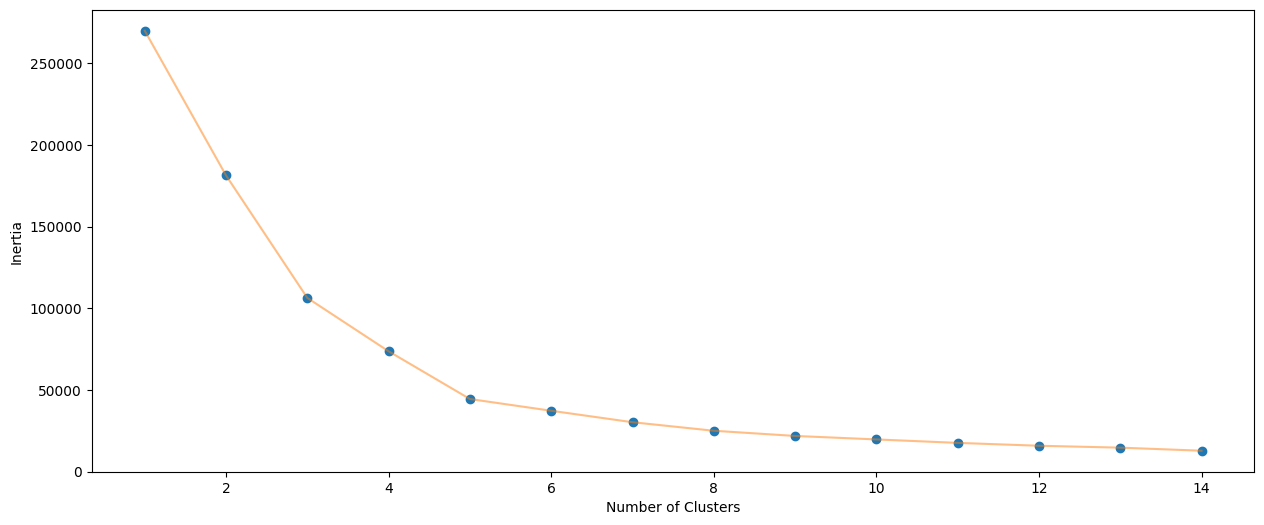

In [22]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [23]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [24]:
h = 0.02
x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

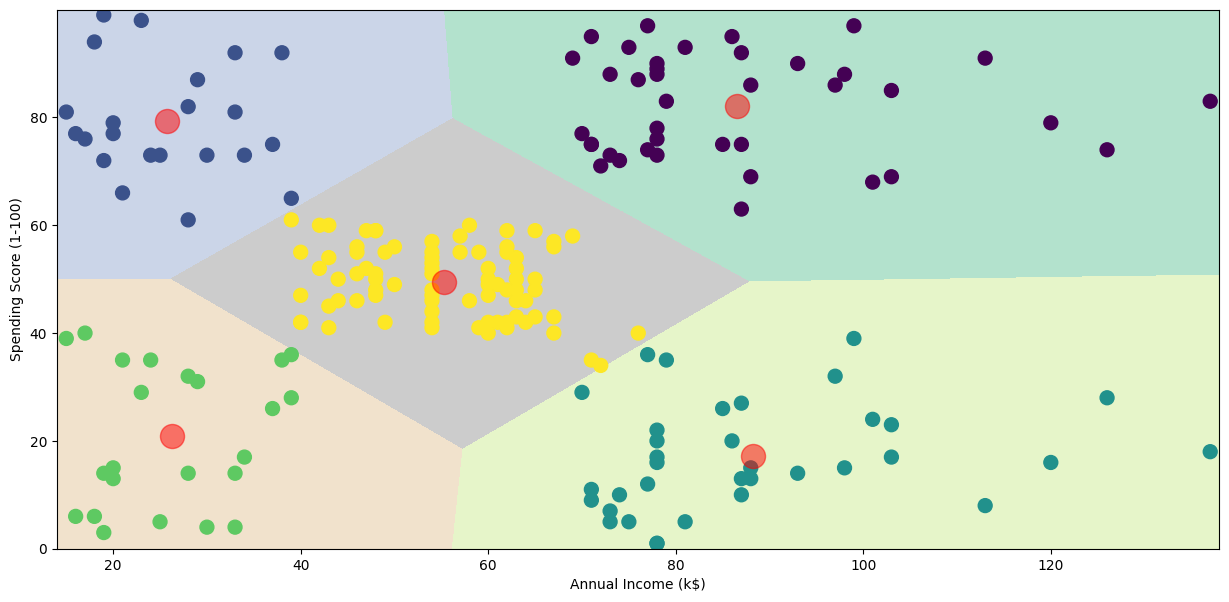

In [25]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [26]:
x3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10,
                        max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    
    algorithm.fit(x3)
    inertia.append(algorithm.inertia_)

c:\Users\niran\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_kmeans.py:1400: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


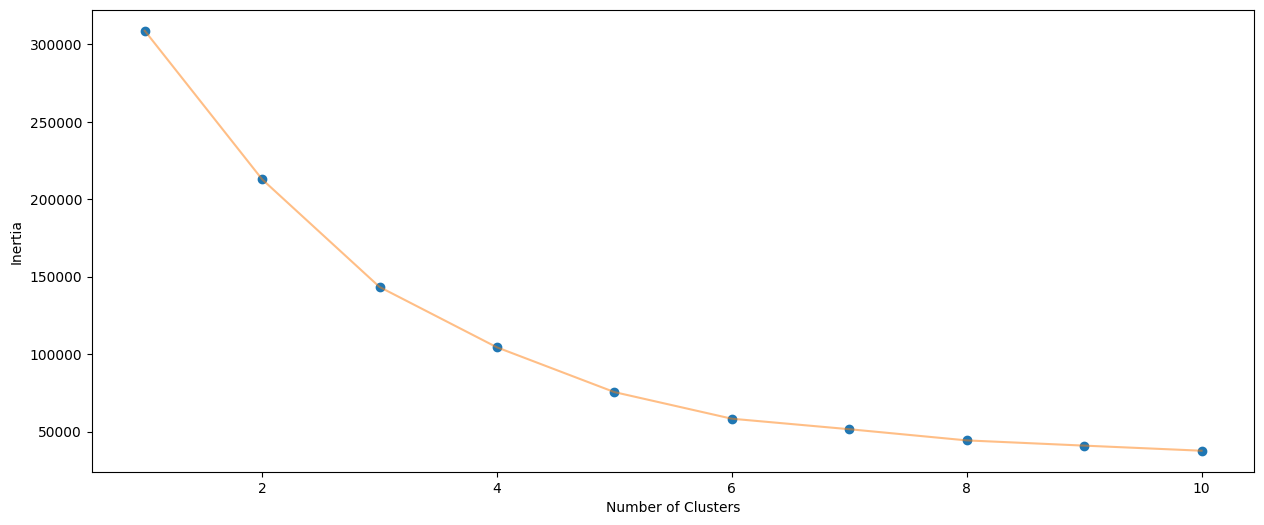

In [27]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [28]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(x3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
